# Итоговая работа.

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline
from scipy.linalg import svd

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [69]:
x = sp.symbols('x')
diff_1 = sp.diff((sp.tan(sp.sin(x))+sp.cos(2*x+3))**2)

In [16]:
print((2*((np.tan(np.sin(1)))**2+1)*np.cos(1)-4*np.sin(5))*(np.cos(5)+np.tan(np.sin(1))))

8.793256497897424


In [74]:
diff1_ = diff_1.subs(x, 1)
print(diff1_)
print(round(diff1_, 3))

(2*(1 + tan(sin(1))**2)*cos(1) - 4*sin(5))*(cos(5) + tan(sin(1)))
8.793


## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

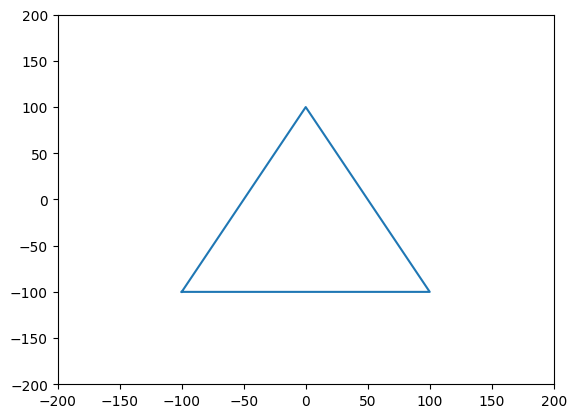

In [ ]:

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


(-200.0, 200.0)

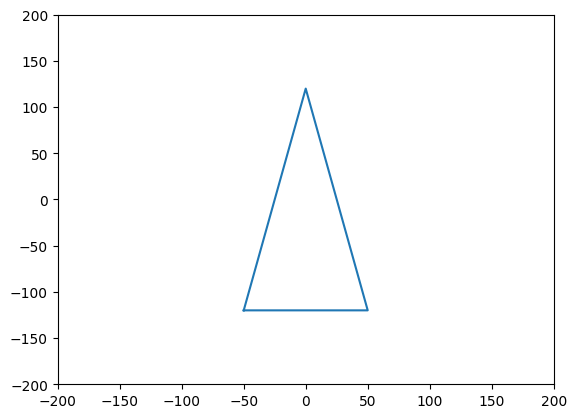

In [27]:
math_less = np.array([[0.5, 0, 0],
    [0, 1.2, 0],
    [0, 0, 0]])
B = A@math_less
x = B[:,0]
y = B[:,1]

plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

(0.0, 400.0)

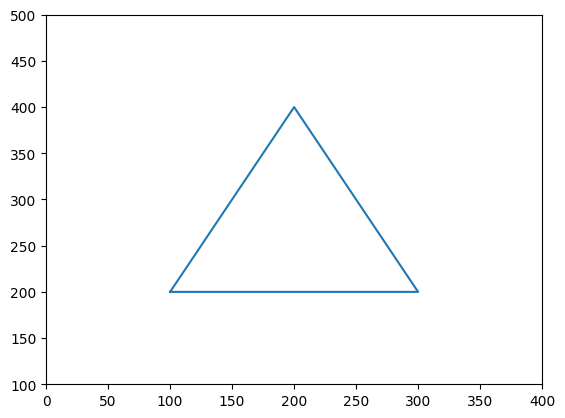

In [35]:
math_smech = np.array([[200, 300, 0]])
B = A+math_smech
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
plt.ylim([100, 500])
plt.xlim([0, 400]) 

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [36]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [47]:
lam, u = np.linalg.eig(m)
print(f'Массив собственных значений {lam}')
print(f'Собственные вектора матрицы', u, sep = '\n')

Массив собственных значений [ 3. -1.]
Собственные вектора матрицы
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [84]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [85]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

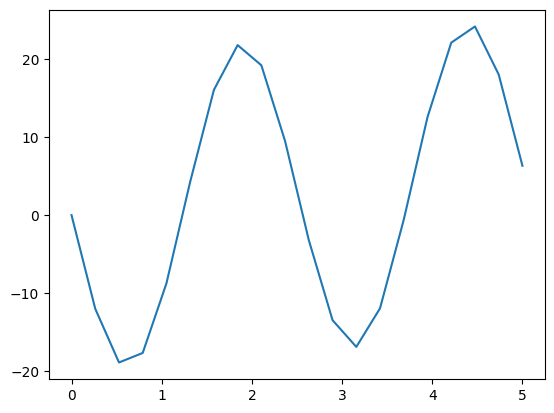

In [86]:
plt.plot(x, fx)
plt.show()

In [97]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))
x0 = [13, 13]

In [98]:
result = minimize (error, x0, method="nelder-mead", options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000043
         Iterations: 76
         Function evaluations: 145


C:\Users\cherniavskaia_m\AppData\Local\Temp\ipykernel_12728\1498439842.py:1: OptimizeWarning: Unknown solver options: xtol
  result = minimize (error, x0, method="nelder-mead", options={'xtol': 1e-8, 'disp': True})


In [99]:
result.x

array([ 2.99999984, 21.37610418])

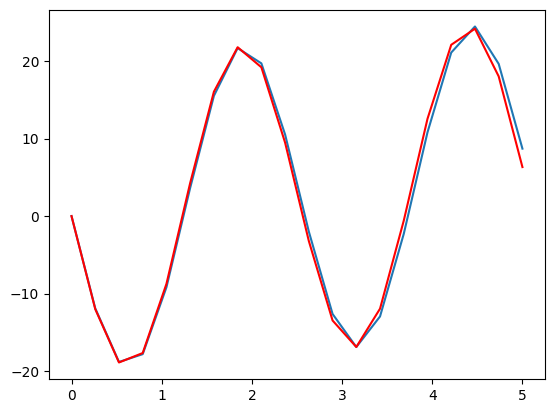

In [100]:
plt.plot(x, f(x, 3, 21.4)) 
plt.plot(x, fx, c='red') 
plt.show()

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [63]:
ratings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [61]:
cosine_dist = np.zeros((10, 10))

In [ ]:
def cosine(a, b):
    a_len = np.linalg.norm(a)
    b_len = np.linalg.norm(b)
    return np.dot(a,b) / (a_len*b_len)

In [ ]:
for i in range(len(ratings)):
    vector_a = ratings[i]
    for j in range(len(ratings)):
        vector_b = ratings[j]
        cosine_ = cosine(vector_a, vector_b)
        if i==j:
            cosine_ = 0 
        cosine_dist[i][j] = cosine_
        
cosine_dist

array([[0.        , 0.82602919, 0.84921529, 0.78340116, 0.81917632,
        0.74118548, 0.72735828, 0.80967522, 0.91065982, 0.86010776],
       [0.82602919, 0.        , 0.81234325, 0.84635337, 0.87138052,
        0.82713107, 0.82629684, 0.80026003, 0.82526308, 0.81968127],
       [0.84921529, 0.81234325, 0.        , 0.84669374, 0.78394299,
        0.79097985, 0.67616223, 0.76289552, 0.82112077, 0.91873051],
       [0.78340116, 0.84635337, 0.84669374, 0.        , 0.69153409,
        0.78665792, 0.83274211, 0.82934667, 0.7770666 , 0.8588687 ],
       [0.81917632, 0.87138052, 0.78394299, 0.69153409, 0.        ,
        0.7764434 , 0.78200468, 0.81236869, 0.87948477, 0.84574789],
       [0.74118548, 0.82713107, 0.79097985, 0.78665792, 0.7764434 ,
        0.        , 0.74011801, 0.84451685, 0.80622876, 0.85514908],
       [0.72735828, 0.82629684, 0.67616223, 0.83274211, 0.78200468,
        0.74011801, 0.        , 0.82669174, 0.81130044, 0.79154718],
       [0.80967522, 0.80026003, 0.7628955

In [67]:
for i in range(len(cosine_dist)):
    print("Для пользователя", i+1, "наиболее похожий пользователь:", np.argmax(cosine_dist[i])+1)

Для пользователя 1 наиболее похожий пользователь: 9
Для пользователя 2 наиболее похожий пользователь: 5
Для пользователя 3 наиболее похожий пользователь: 10
Для пользователя 4 наиболее похожий пользователь: 10
Для пользователя 5 наиболее похожий пользователь: 9
Для пользователя 6 наиболее похожий пользователь: 10
Для пользователя 7 наиболее похожий пользователь: 4
Для пользователя 8 наиболее похожий пользователь: 6
Для пользователя 9 наиболее похожий пользователь: 1
Для пользователя 10 наиболее похожий пользователь: 3
